# KNN Implementation

In [50]:
import numpy as np

class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.x_train = None
        self.y_train = None   
        
    def find_majority_class(self, X):
        # to compute the Euclidean distance between two arrays in numpy with norm
        distances = [np.linalg.norm(X - x_train) for x_train in self.x_train]
        n_nearest_neighbors_indices = np.argsort(distances)[:self.n_neighbors]
        n_nearest_neighbors_classes = np.take(self.y_train, n_nearest_neighbors_indices)
        return np.bincount(n_nearest_neighbors_classes).argmax()
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self, x_test):
        return [self.find_majority_class(x) for x in x_test]
        
    def get_params(self, deep=True):
        return {"n_neighbors": self.n_neighbors}
    

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import math

# Read data

In [52]:
df = pd.read_csv('data/Disease_symptom_and_patient_profile_dataset (1).csv', header=None)
df = df.drop(0)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9
1,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


## Seperate the target and the features

In [54]:
features = df.drop(9, axis=1)
target = df[9].replace({'Positive':1, 'Negative':0})

## One-Hot Encoding on columns with categirical data(column=[0, 6, 7, 8])

In [55]:
features_got_dummies = pd.get_dummies(features, columns=[0, 6])

In [56]:
# Apply ordinal encoding to the specified columns
label_encoder = LabelEncoder()
features_got_labled = features_got_dummies.copy()
features_got_labled[7] = label_encoder.fit_transform(features_got_dummies[7])
features_got_labled[8] = label_encoder.fit_transform(features_got_dummies[8])

## Replace the 'Yes' and 'No' to 1 and 0 

In [57]:
rep_features = features_got_labled.replace({'Yes':1, 'No':0, True:1, False:0})

## Convert strs in column 5 to ints

In [58]:
final_features = rep_features.copy()

In [59]:
final_features[5] = [int(x) for x in rep_features[5]]

# Standarization vs Normalization

# Standardization

In [61]:
stand_x = final_features.copy()

In [90]:
scaler = StandardScaler()
stand_x[5] = scaler.fit_transform(stand_x[[5]])
stand_x[7] = scaler.fit_transform(stand_x[[7]])
stand_x[8] = scaler.fit_transform(stand_x[[8]])

In [63]:
# k < sqrt(n)
math.sqrt(len(target))

18.681541692269406

In [64]:
stand_x_train, stand_x_test, stand_y_train, stand_y_test = train_test_split(stand_x, target, test_size=0.25, random_state=0)

np_stand_x_train = np.array(stand_x_train)
np_stand_y_train = np.array(stand_y_train)
np_stand_x_test = np.array(stand_x_test)
np_stand_y_test = np.array(stand_y_test)

## Model with KNN, K = 7

In [65]:
knn_classifier = KNN(n_neighbors=7)
knn_classifier.fit(np_stand_x_train, np_stand_y_train)
stand_y_predict_7 = knn_classifier.predict(np_stand_x_test)
accuracy = accuracy_score(np_stand_y_test, stand_y_predict_7)

In [66]:
accuracy

0.6477272727272727

## K = 11

In [67]:
knn_classifier = KNN(n_neighbors=11)
knn_classifier.fit(np_stand_x_train, np_stand_y_train)
stand_y_predict_11 = knn_classifier.predict(np_stand_x_test)
accuracy = accuracy_score(np_stand_y_test, stand_y_predict_11)

In [68]:
accuracy

0.7159090909090909

## K = 15

In [69]:
knn_classifier = KNN(n_neighbors=15)
knn_classifier.fit(np_stand_x_train, np_stand_y_train)
stand_y_predict_15 = knn_classifier.predict(np_stand_x_test)
accuracy = accuracy_score(np_stand_y_test, stand_y_predict_15)

In [70]:
accuracy

0.6704545454545454

## use accuracy to find optimal K

In [73]:
accuracy_rate = []
error_rate = []
for i in range(1, 20):
    model = KNN(n_neighbors=i)
    model.fit(np_stand_x_train, np_stand_y_train)
    y_pred = model.predict(np_stand_x_test)
    accuracy_rate.append(accuracy_score(np_stand_y_test, y_pred))
    score = cross_val_score(model, np_stand_x_train, np_stand_y_train, cv=10, scoring='accuracy')
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

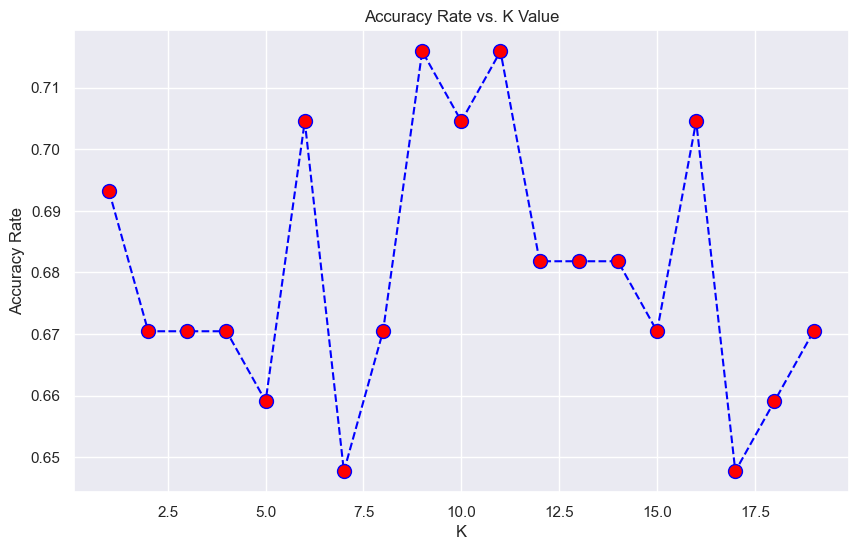

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

## So for the best K = 11

In [75]:
accuracy_rate[10]
# indice + 1 = K

0.7159090909090909

In [76]:
accuracy_rate[4]

0.6590909090909091

Text(0, 0.5, 'Error Rate')

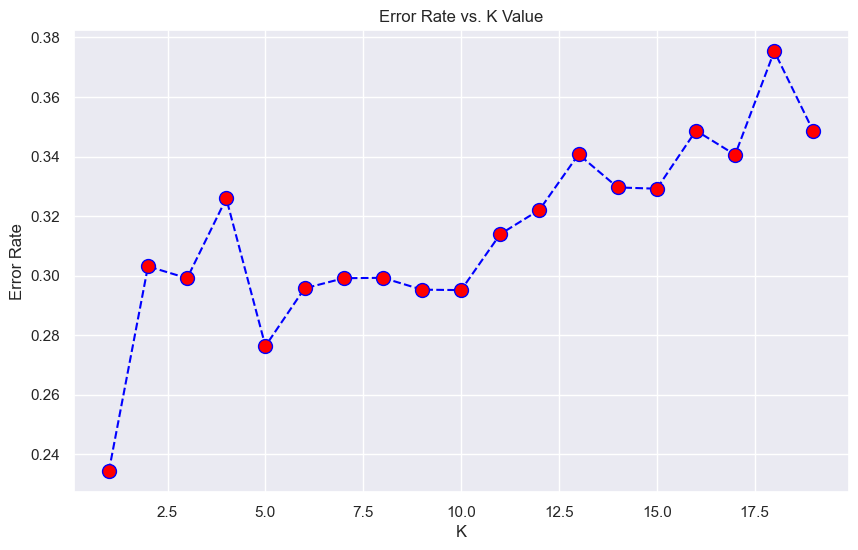

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Normalization

In [78]:
normal_x = final_features.copy()

In [79]:
normal_x[5] = normalize(normal_x[[5]])
normal_x[7] = normalize(normal_x[[7]])
normal_x[8] = normalize(normal_x[[8]])

In [80]:
norm_x_train, norm_x_test, norm_y_train, norm_y_test = train_test_split(normal_x, target, test_size=0.25, random_state=0)

np_norm_x_train = np.array(norm_x_train)
np_norm_y_train = np.array(norm_y_train)
np_norm_x_test = np.array(norm_x_test)
np_norm_y_test = np.array(norm_y_test)

## Model with KNN, K=5

In [81]:
model = KNN(5)
model.fit(np_norm_x_train, np_norm_y_train)
norm_y_predict_5 = model.predict(np_norm_x_test)
accuracy = accuracy_score(np_norm_y_test, norm_y_predict_5)

In [82]:
accuracy

0.6136363636363636

## Model with KNN, K=12

In [83]:
model = KNN(12)
model.fit(np_norm_x_train, np_norm_y_train)
norm_y_predict_12 = model.predict(np_norm_x_test)
accuracy = accuracy_score(np_norm_y_test, norm_y_predict_12)

In [84]:
accuracy

0.6136363636363636

# Since the best accuracy belongs to standardized data set with k = 10

## Accuracy?

In [85]:
acc_score = accuracy_score(np_stand_y_test, stand_y_predict_11)

print(f'accuracy score for k = 10 is {acc_score}')

accuracy score for k = 10 is 0.7159090909090909


## Confusion Matrix

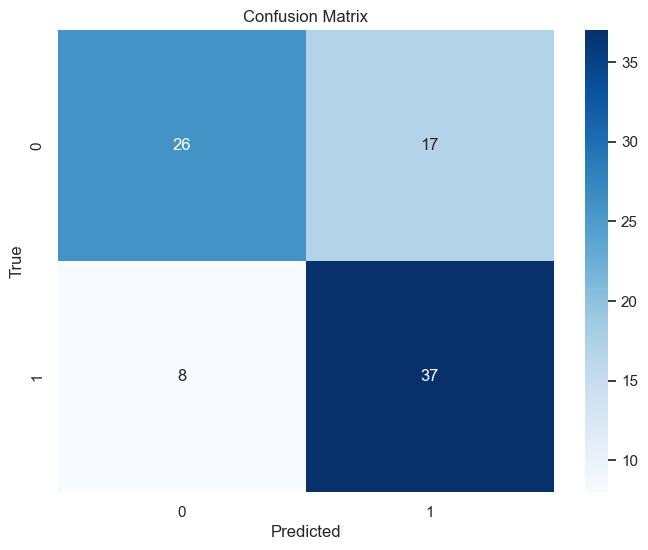

In [86]:
conf_matrix = confusion_matrix(np_stand_y_test, stand_y_predict_11, labels=[0,1])
# Create a figure and an axis for the plot
plt.figure(figsize=(8, 6))
sns.set()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve for the KNN modek with k = 10 and standardized

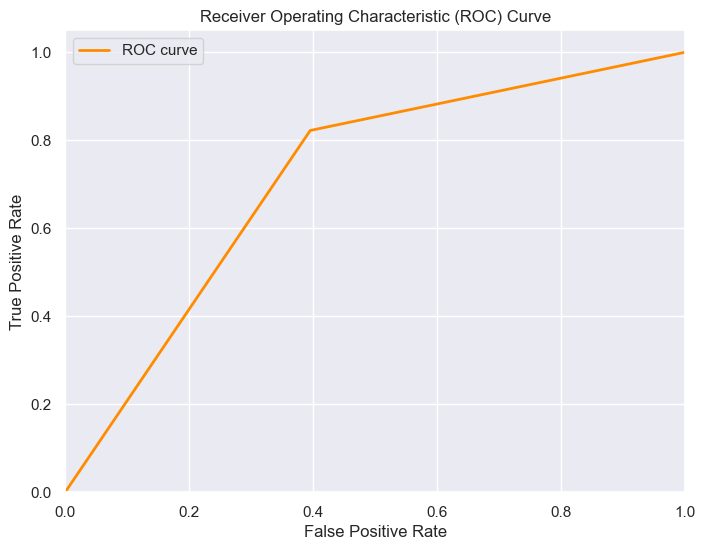

In [89]:
fpr, tpr, thresholds = roc_curve(np_stand_y_test, stand_y_predict_11)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

ROC is a graph that shows TPR against FPR.
It shows in a specific threshold how much our model can predict the positive correctly rather than uncorrectly.
The more the steep is the better out model work and the more the auc or the area under the roc curve is the better our model
We can see that at the first part of the curve the TPR is double of FPR so to this point the model is working properly